# Using Python for neuroimaging data - [NiBabel](https://nipy.org/nibabel/)

The primary goal of this section is to become familiar with `loading`, `modifying`, `saving`, and `visualizing` `neuroimages` in `Python`. A secondary goal is to develop a conceptual understanding of the `data structures` involved, to facilitate diagnosing problems in `data` or `analysis` `pipelines`.

To these ends, we'll be exploring the core `python library` for `handling` and `wrangling` `neuroimaging` `data`: [nibabel](). While this short introduction should get you started, it is well worth your time to look through `nibabel's` excellent [documentation](http://nipy.org/nibabel/). 

# [Nibabel](https://nipy.org/nibabel/)

![](https://nipy.org/nibabel/_static/nibabel-logo.svg)


`Nibabel` is a low-level `Python library` that gives access to a variety of `imaging` `formats`, with a particular focus on providing a common interface to the various **volumetric** formats produced by `MRI scanners` and used in common `neuroimaging` toolkits such as [FSL](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/), [AFNI](https://afni.nimh.nih.gov/), [FreeSurfer](https://surfer.nmr.mgh.harvard.edu/) and [SPM](https://www.fil.ion.ucl.ac.uk/spm/):

 - `NIfTI-1`
 - `NIfTI-2`
 - `SPM Analyze`
 - `FreeSurfer` `.mgh`/`.mgz` files
 - Philips `PAR/REC`
 - Siemens `ECAT`
 - `DICOM` (limited support)

It also supports **surface** file formats:

 - `GIFTI`
 - `FreeSurfer` `surfaces`, `labels` and `annotations`

and others such as:

**Connectivity**

 - `CIFTI-2`

**Tractography**

 - `TrackViz` `.trk` files

as well as a number of related `formats`.

**Note:** Almost all of these can be `loaded` through the [nibabel.load](https://nipy.org/nibabel/reference/nibabel.loadsave.html#nibabel.loadsave.load) `interface`.

## Setup

Before we actually start, we are going to need to `import` the `nibabel` `library` and a few others, more or less related to `basic computing` and `plotting`.

In [3]:
%matplotlib inline


In [4]:
from nilearn import plotting
import pylab as plt
import numpy as np
import nibabel as nb

Great, let's get started.

## Loading and inspecting images in `nibabel`

At first, we are going to explore how we can `load` and `inspect` `neuroimages` in `nibabel`. To this end, we will use parts of the `tutorial datasets` you should've [downloaded during the course setup](https://peerherholz.github.io/Cog_Com_Neuro_ML_DL/setup.html#getting-the-course-content). Specifically, we are going to have a closer look at a `functional MRI` of `sub-01`. As mentioned before, basically all `file formats` are accessible via the `nibabel load` `interface`. All we need to do is to provide the `path` to the file we want to `load`:

In [5]:
img = nb.load('/data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz')

That's all it takes and with that, we can directly inspect our now `loaded` `fMRI` `image`, for example via `print` which will give is the information stored in the `header` of the `image`: 

In [4]:
print(img)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (64, 64, 30, 184)
affine: 
[[-3.99471426e+00 -2.04233140e-01  2.29353290e-02  1.30641693e+02]
 [-2.05448717e-01  3.98260689e+00 -3.10890853e-01 -9.74732285e+01]
 [ 6.95819734e-03  3.11659902e-01  3.98780894e+00 -8.06465759e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b'?TR:2500.000 TE:50'
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  64  64  30 184   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.        4.        4.        3.999975  2.5       1.        1.
  1.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_unit

This `data-affine-header structure` is common to `volumetric` `formats` in `nibabel`, though the details of the `header` will vary from `format` to `format`. As you can see above, the here utilized example entails `information` about the `data shape`, `dimensions`, `affine`, `meta-data` and much more. All of them are very useful and good to know (and should be identical to values indicated the corresponding [json sidecar file](https://bids-specification.readthedocs.io/en/stable/02-common-principles.html#keyvalue-files-dictionaries) if you use [BIDS](https://bids.neuroimaging.io/)). 



```{admonition} Question
:class: dropdown

Please have a look at each of the `field`s displayed above and try to answer the following questions: 
  * what does the `value` refer to?
  * what does the respective `information` represent?
```

### Accessing specific parameters

Seeing all these `parameters` entailed in the `header` we might want to evaluate and utilize some of them during various points of our `analysis pipeline`. With `nibabel` we can easily access all of them, either directly, e.g. the `affine`: 



In [5]:
affine = img.affine
affine


array([[-3.99471426e+00, -2.04233140e-01,  2.29353290e-02,
         1.30641693e+02],
       [-2.05448717e-01,  3.98260689e+00, -3.10890853e-01,
        -9.74732285e+01],
       [ 6.95819734e-03,  3.11659902e-01,  3.98780894e+00,
        -8.06465759e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

or through the `header` `object`:

In [6]:
header = img.header['pixdim']
header


array([-1.      ,  4.      ,  4.      ,  3.999975,  2.5     ,  1.      ,
        1.      ,  1.      ], dtype=float32)

```{admonition} Note
Note that in the `'pixdim'` above contains the voxel resolution  (`4., 4., 3.999`), as well as the TR (`2.5`).
```

Furthermore, we can also access the underlying `data` of the `image`:

In [6]:
data = img.get_fdata()
data.shape

(64, 64, 30, 184)

#### Notes on working with neuroimaging and memory allocation

Why not just directly access the `data` via `img.data`? Working with `neuroimages` can use a lot of `memory`, so `nibabel` works hard to be `memory efficient`. If it can read some `data` while leaving the rest on `disk`, it will. `img.get_data()` reflects that it's doing exactly that via some work behind the scenes.

Lets dive a bit further into this:

 - `img.get_data_dtype()` shows the `type` of the `data` on `disk`
 - `img.get_data().dtype` shows the `type` of the `data` that you're working with

In [8]:
print((data.dtype, img.get_data_dtype()))

(dtype('<i2'), dtype('<i2'))


Even though true here, these are not always the same, and not being clear on this [has caused problems](https://github.com/nipy/nibabel/issues/490). Further, modifying one does not update the other. This is especially important to keep in mind later when saving `files`.

### What's actually in the `neuroimaging` `data`?

It might sound less crazy/fancy than you thought/hoped for but the `data` is a simple `numpy` `array`. It has a `shape`, it can be `sliced` and generally manipulated as you would any `array` as it contains `numerical values` in certain `dimensions` with certain expressions. Lets use `matplotlib` to visualize the `data` after directly accessing it via `numpy` to make this more clear:

(64, 64, 30, 184)


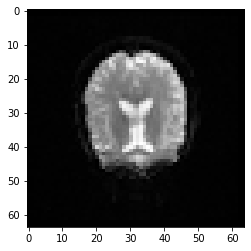

In [9]:
plt.imshow(data[:, :, data.shape[2] // 2, 0].T, cmap='Greys_r')
print(data.shape)

```{admonition} Question
:class: dropdown

Think about what the `data` and the respective `values` represents in terms of the discussed `MRI` principles and the signal we obtain through it. 

```

### Practical exercise 1:

How about some small practical exercise to further familiarize yourself with `nibabel` and `neuroimaging` `data` handling?

Please load the `T1w` `data` from `subject 1` and then `plot` the `image` using the same `volume` `indexing` as before. Also, please `print` the `shape` of the `data`. Don't worry if get stuck: just give it your best try and if it doesn't work out, have a look at the solution below!

In [ ]:
# work on solution here

```{admonition} Solution
:class: dropdown

    t1 = nb.load('/data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz')
    data = t1.get_data()
    plt.imshow(data[:, :, data.shape[2] // 2].T, cmap='Greys_r')
    print(data.shape)

```

### Visually inspecting `images` via `orthoview()`

`Nibabel` has its own `viewer`, which can be accessed through **`img.orthoview()`** where `img` is the `image` you `loaded` via e.g. `.load`. It should present you with either `3` or `4` `subplots` for the respective `dimensions`, ie. `3` `spatial` (`x`, `y`, `z`) and in case of `fMRI` `images` `1` `temporal`(`time` indicated via `TR`). This `viewer` `scales` `voxels` to reflect their `size`, and `label` orientations. 

**Warning:** `img.orthoview()` may not work properly on OS X.

#### Sidenote on plotting with `orthoview()`
As with other figures, f you initiated `matplotlib` with `%matplotlib inline`, the output figure will be static. If you use `orthoview()` in a normal `IPython console`, it will create an `interactive` window, and you can click to select different slices, similar to `mricron` or comparable viewers. To get a similar experience in a `jupyter notebook`, use `%matplotlib notebook`. But don't forget to close `figures` afterward again or use `%matplotlib inline` again, otherwise, you cannot `plot` any other `figures`.

In [10]:
%matplotlib notebook
img.orthoview()

<IPython.core.display.Javascript object>

<OrthoSlicer3D: /data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz (64, 64, 30, 184)>

After we got a broad and general overview of `neuroimaging data` and what it entails, we should spend a bit more time on more precise aspects of `neuroimaging` `data` and its handling using `nibabel`. Specifically, we will spend a closer look at the `header` and the `affine`. **Please note** that we will be using the `t1w` `data` of `sub-01` for this part. Thus, if you didn't went through the `previous` `exercise`, you should do so now or make sure to check/run the solution. To make sure everything works, please try to use `.orthoview()` to `plot` and `investigate` the `t1w` `image`.



```{admonition} Solution
:class: dropdown

    t1.orthoview()

```

### Header

The `header` is a general property of `neuroimaging data` in most `file formats` and in `nibabel` the structure that stores all of the `metadata` of the `image`. As indicated above, you can query it directly, if necessary. For example, getting the `description`:


In [13]:
t1.header['descrip']


array(b'FSL5.0', dtype='|S80')

But it also provides `interfaces` for the more common information, such as `get_zooms`, `get_xyzt_units`, `get_qform`, `get_sform` which respectively provide `spatial`, `temporal` and `affine` `information` of the `image` at hand:

In [14]:
t1.header.get_zooms()


(1.0, 1.2993759, 1.0)

In [15]:
t1.header.get_xyzt_units()


('mm', 'sec')

In [16]:
t1.header.get_qform()


array([[ 9.99131938e-01, -5.16292391e-02,  1.25136054e-02,
        -1.25263863e+02],
       [ 4.07721521e-02,  1.29202043e+00, -9.81179047e-02,
        -7.31330109e+01],
       [-8.54416425e-03,  1.28044319e-01,  9.95096119e-01,
        -1.77554291e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [17]:
t1.header.get_sform()


array([[ 9.99131918e-01, -5.16291820e-02,  1.25127016e-02,
        -1.25263863e+02],
       [ 4.07721959e-02,  1.29202044e+00, -9.81179178e-02,
        -7.31330109e+01],
       [-8.54506902e-03,  1.28044292e-01,  9.95096147e-01,
        -1.77554291e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

Speaking of the `affine`, lets check it out in more detail:

### Affine

In our case, the `affine` refers to a `4 x 4 numpy array`. This describes the `transformation` from the `voxel space` (`indices` `[i, j, k]`) to the `reference space` (`distance` in `mm` `(x, y, z)`).

It can be used, for instance, to discover the `voxel` that contains the `origin` of the `image`: 

In [18]:
x, y, z, _ = np.linalg.pinv(affine).dot(np.array([0, 0, 0, 1])).astype(int)

print("Affine:")
print(affine)
print
print("Center: ({:d}, {:d}, {:d})".format(x, y, z))

Affine:
[[-3.99471426e+00 -2.04233140e-01  2.29353290e-02  1.30641693e+02]
 [-2.05448717e-01  3.98260689e+00 -3.10890853e-01 -9.74732285e+01]
 [ 6.95819734e-03  3.11659902e-01  3.98780894e+00 -8.06465759e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Center: (31, 27, 18)


The `affine` also encodes the `axis` `orientation` and `voxel sizes`:

In [19]:
nb.aff2axcodes(affine)

('L', 'A', 'S')

In [20]:
nb.affines.voxel_sizes(affine)

array([3.99999995, 4.00000009, 3.99997491])

In [21]:
nb.aff2axcodes(affine)

('L', 'A', 'S')

In [22]:
nb.affines.voxel_sizes(affine)

array([3.99999995, 4.00000009, 3.99997491])

Normally, we're not particularly interested in the `header` or the `affine`. But it's important to know they're there. And especially, to remember to copy them when making new `images` or working with `derivatives`, so that they stay aligned with the original `image` (if required).

Now you might think: it seems a bit cumbersome to get/access all that information to e.g. check and/or evaluate a given `image`. First of all: come on, it's just a few lines of rather simple code. Second, if you really don't want to fire up a `python` session and run a few commands/functions: `nibabel` also has your back here.   

## `nib-ls`

`Nibabel` comes packaged with a `command-line tool` called [nib-lis](https://nipy.org/nibabel/reference/nibabel.cmdline.html?highlight=nib%20ls#module-nibabel.cmdline.ls) to `print` `common` `metadata` about any (`volumetric`) `neuroimaging` `format` `nibabel` supports. By default, it shows (**`on-disk`**) `data type`, `dimensions` and `voxel sizes`. Lets try it out via using the `fMRI` `data` of `sub-01` again:

In [23]:
!nib-ls /data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz

/data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz int16 [ 64,  64,  30, 184] 4.00x4.00x4.00x2.50   sform



We can also inspect `header` `fields` by name, for instance, `descrip`:

In [24]:
!nib-ls -H descrip /data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz

/data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz float32 [256, 156, 256] 1.00x1.30x1.00   b'FSL5.0' sform



This concludes the basic `neuroimaging data` exploration section which discussed `commands` and `functions` should already allow you to do a lot of common tasks and work with `neuroimaging data`. However, there's obviously way more to it. For example, `creating` and `saving` `images`.

## Creating and saving images

Suppose we want to save `space` by `rescaling` our `image` to a smaller `datatype`, such as an `unsigned byte`. To do this, we first need to take the `data`, change its `datatype` and `save` this new `data` in a new `NIfTI image` with the **same** `header` and `affine` as the `original image`. At first, we need to `load` the `image` and `get` the `data` (using the `fMRI` `data` of `sub-01` once more):

In [7]:
img = nb.load('/data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz')
data = img.get_fdata()

Now we force the `values` to be between `0` and `255` and `change` the `datatype` to `unsigned 8-bit`:

In [8]:

rescaled = ((data - data.min()) * 255. / (data.max() - data.min())).astype(np.uint8)

Now we can `save` the changed `data` into a new `NIfTI file`:

In [9]:
new_img = nb.Nifti1Image(rescaled, affine=img.affine, header=img.header)
nb.save(new_img, 'rescaled_image.nii.gz')

Let's look at the `datatypes` of the `data array`, as well as of the `nifti image`:

In [10]:
print((new_img.get_fdata().dtype, new_img.get_data_dtype()))

(dtype('float64'), dtype('<i2'))


That's not optimal. Our `data array` has the correct `type`, but the `on-disk format` is determined by the `header`, so `saving` it with `img.header` will not do what we want. Also, let's take a look at the `size` of the `original` and `new` `file`.

In [11]:
orig_filename = img.get_filename()
!du -hL rescaled_image.nii.gz $orig_filename

 12M	rescaled_image.nii.gz
 24M	/data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz


So, let's correct the `header` issue with the `set_data_dtype()` `function`:

In [12]:
img.set_data_dtype(np.uint8)

and then saving `image` again:


In [13]:
new_img = nb.Nifti1Image(rescaled, affine=img.affine, header=img.header)
nb.save(new_img, 'rescaled_image.nii.gz')


After which we evaluate our `image` again:

In [14]:
print((new_img.get_fdata().dtype, new_img.get_data_dtype()))


(dtype('float64'), dtype('uint8'))


Perfect! Now the `data` `types` are correct. And if we look at the `size` of the `image` we even see that it got a bit smaller.

In [36]:
!du -hL rescaled_image.nii.gz

 10M	rescaled_image.nii.gz


# Conclusions

In this first introduction of how to work with `neuroimaging data` using `python`, we've explored `load`ing, `saving` and `visualizing` `neuroimages` via `nibabel`, as well as how it can make some more sophisticated manipulations easy. At this point, you should be able to `inspect` and `plot` most `images` you encounter, as well as make modifications while preserving the `alignment` (at least for basic operations).